# **Identifikasi Outlier dengan K-Nearest Neighbors (KNN) dalam Pemahaman Data**

## 1. Mengapa KNN Bisa Digunakan untuk Deteksi Outlier?  
K-Nearest Neighbors (KNN) bisa digunakan untuk deteksi outlier karena algoritma ini bekerja berdasarkan kedekatan dan kepadatan data di sekitarnya. Berikut adalah beberapa alasan utama:

1. Mengukur Jarak dari Titik ke Tetangganya
KNN menghitung jarak antara titik data dan tetangga terdekatnya. Jika sebuah titik memiliki jarak yang jauh lebih besar dibandingkan titik lain di sekitarnya, maka kemungkinan besar titik tersebut adalah outlier.

2. Berdasarkan Kepadatan Data (Density-Based Detection)
KNN bisa digunakan untuk mendeteksi outlier dengan pendekatan kepadatan:
Jika suatu titik memiliki sedikit tetangga dalam radius tertentu, maka titik tersebut kemungkinan outlier.
Sebaliknya, titik yang berada dalam area dengan banyak titik lain dianggap normal.

3. Digunakan dalam Algoritma Local Outlier Factor (LOF)
LOF adalah metode deteksi outlier berbasis KNN yang membandingkan kepadatannya dengan kepadatan tetangganya. Jika suatu titik memiliki kepadatan yang jauh lebih kecil dari tetangganya, maka kemungkinan besar titik tersebut adalah outlier.

4. Fleksibel untuk Data Berstruktur dan Tak Berstruktur
KNN bisa digunakan untuk berbagai jenis data, baik data numerik maupun non-numerik. Ini membuatnya cocok untuk deteksi outlier dalam berbagai bidang, seperti analisis keuangan, deteksi anomali dalam jaringan, dan pengolahan citra.

## 2. Langkah-Langkah Deteksi Outlier dengan KNN  
 Berikut adalah langkah-langkah deteksi outlier menggunakan KNN:

1. Persiapan Data
Kumpulkan dataset yang akan dianalisis.
Pastikan dataset berisi fitur numerik agar KNN dapat menghitung jarak dengan akurat.
Lakukan pembersihan data jika diperlukan (misalnya, menangani nilai yang hilang atau tidak valid).
2. Pilih Jumlah Tetangga (k-Nearest Neighbors)
Tentukan nilai k, yaitu jumlah tetangga yang akan digunakan untuk analisis.
Nilai k yang kecil lebih sensitif terhadap outlier, sedangkan k yang besar lebih stabil tetapi bisa mengabaikan beberapa outlier.
3. Hitung Jarak Antar Titik
Gunakan jarak Euclidean atau metrik lainnya untuk mengukur seberapa dekat setiap titik dengan tetangga-tetangganya.
Misalnya, untuk dua titik A(x 1,y 1) dan 𝐵 (𝑥2,𝑦2)B(x 2​,y 2), jarak Euclidean dihitung sebagai:
d(A,B)= (x 2−x 1) 2+(y 2−y 1)2
4. Hitung Kepadatan Titik (Local Reachability Density - LRD)
Kepadatan lokal dihitung berdasarkan rata-rata jarak ke tetangga terdekatnya.
Titik yang jauh dari kelompoknya akan memiliki kepadatan rendah dibandingkan tetangga lainnya.
5. Hitung Local Outlier Factor (LOF)
LOF adalah rasio kepadatan titik terhadap kepadatan tetangganya.
Jika LOF mendekati 1, titik tersebut normal.
Jika LOF jauh lebih besar dari 1, titik tersebut adalah outlier.
6. Identifikasi dan Analisis Outlier
Tandai titik-titik yang memiliki LOF tinggi sebagai outlier.
Visualisasikan hasilnya menggunakan scatter plot atau box plot untuk melihat distribusi outlier dalam dataset.

## Kesimpulan  
Deteksi outlier dengan KNN dan LOF efektif dalam menemukan titik yang berbeda dari pola umum dalam dataset. Proses ini berguna untuk mendeteksi anomali, membersihkan data, dan meningkatkan kualitas analisis dalam berbagai bidang seperti keuangan, cybersecurity, dan deteksi penipuan

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.1 MB/s eta 0:00:00


Perintah berikut digunakan untuk menginstal pustaka Python yang memungkinkan koneksi ke database:
1. %pip install pymysql → Menginstal pustaka pymysql, yang digunakan untuk menghubungkan Python dengan MySQL atau MariaDB menggunakan protokol MySQL asli.
2. %pip install psycopg2 → Menginstal pustaka psycopg2, yang digunakan untuk menghubungkan Python dengan PostgreSQL, mendukung transaksi, dan menjalankan kueri SQL.

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier_knn
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.141421        False
  2     Iris-setosa          14.0          2.0          40.9         30.0     43.517123         True
  3     Iris-setosa           1.3          0.2           4.7          3.2      0.264575        False
  4     Iris-setosa           1.5          0.2           4.6          3.1      0.244949        False
  5     Iris-setosa           1.4          0.2           5.0          3.6      0.223607        False
  6     Iris-setosa           1.7          0.4           5.4          3.9      0.374166        False
  7     Iris-setosa           1.4          0.3           4.6          3.4      0.316228        False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.200000        False
  9     Iris-setosa           1.4          0.2           4.4          2.9      0.346410    

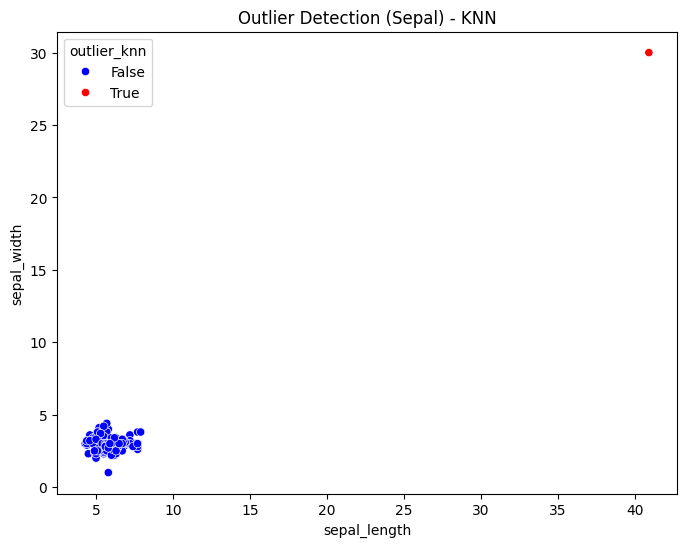

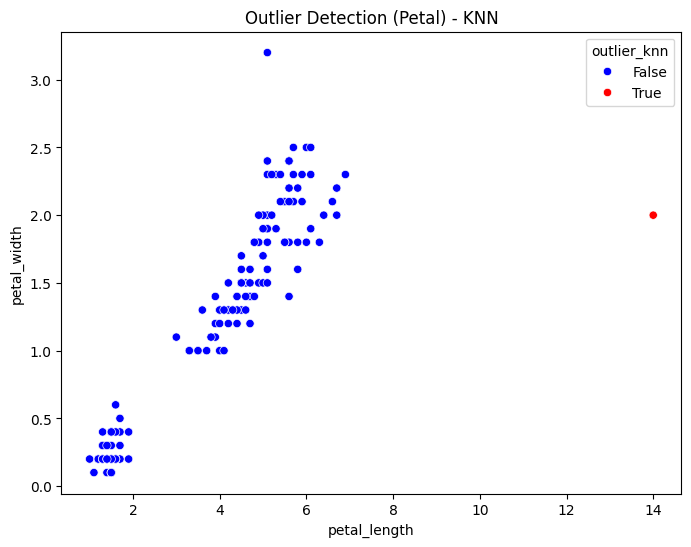

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1c79828e-posgressqlpendata.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_lNd8P_-IyQzpcnKg3Ye",
        database="defaultdb",
        port=14572
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM bunga")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-3f95b8aa-mysqll.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_DYTBfDjLFuF2XVSXIqF",
        database="flowers_mysql",
        port=12288
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowermysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# KNN Outlier Detection
def knn_outlier_detection(data, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    avg_distances = distances[:, -1]  # Ambil jarak k-terjauh sebagai skor
    return avg_distances

# Hitung K-NN distance
df_merged["knn_distance"] = knn_outlier_detection(data_values, k=5)

# Tentukan threshold sebagai nilai rata-rata + 2 standar deviasi
threshold = df_merged["knn_distance"].mean() + 2 * df_merged["knn_distance"].std()
df_merged["outlier_knn"] = df_merged["knn_distance"] > threshold

# Cetak hasil
df_result = df_merged[["id", "class", "petal_length", "petal_width", "sepal_length", "sepal_width", "knn_distance", "outlier_knn"]]
print(df_result.to_string(index=False))
num_outliers = df_merged["outlier_knn"].sum()
print(f"\nJumlah outlier: {num_outliers}")

# Cetak data outlier
outliers = df_merged[df_merged["outlier_knn"]]
print("\nData Outlier:")
print(outliers.to_string(index=False))

# Visualisasi outlier berdasarkan K-NN
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier_knn"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal) - KNN")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier_knn"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal) - KNN")
plt.show()

Kode ini melakukan deteksi outlier menggunakan metode K-Nearest Neighbors (KNN) pada dataset Iris yang diperoleh dari dua database (MySQL dan PostgreSQL).

Data dari kedua database digabungkan berdasarkan kolom "id" dan "class", lalu fitur numerik (petal_length, petal_width, sepal_length, sepal_width) digunakan untuk perhitungan jarak dengan algoritma KNN.

Jarak ke tetangga ke-5 dihitung untuk setiap titik sebagai indikator outlier, kemudian outlier diidentifikasi berdasarkan threshold rata-rata jarak ditambah 2 standar deviasi. Hasilnya:

Jumlah outlier dihitung dan ditampilkan dalam dataframe.
Data outlier ditampilkan secara eksplisit.
Visualisasi scatter plot dibuat untuk menunjukkan distribusi outlier pada Sepal dan Petal, dengan titik outlier berwarna merah.